First thing we want to do is look at the number and type of images we have, as well as their sizes

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
seed = 180

In [3]:
print(os.getcwd())

C:\Users\Alfredo\Documents\GitHub\Capstone3\Notebooks


We will first iterate over all the images saved in the positive tagged folder. We plan on documenting the size of the image as well as the extension type and name for further analysis:

In [4]:
from skimage.io import imread
#first we are going to iterate over the positive tagged images
folder_dir = '../data/pos'
W=[]
H=[]
D=[]
type_count = []
names = []
#we first iterate over all the images
for images in os.listdir(folder_dir):
    #identify the type of image as well as the dimensions
    d_type = images.split('.')[-1]
    path = folder_dir + '/'+images
    image = imread(path)
    try: 
        w, h, d = image.shape
    except:
        #ignore and print error images that have more than 3 dimensions
        print(images)
    W.append(w)
    H.append(h)
    D.append(d)
    type_count.append(d_type)
    names.append(images)

In [5]:
#create a positive dataframe with the information for positive images
pos  = pd.DataFrame({'W' :W, 'H':H, 'D':D, 'type':type_count, 'name' : names})

In [6]:
pos.head()

,W,H,D,type,name
0,267,400,3,jpg,02750f88-3780-436b-8aec-9051593c25ba.jpg
1,288,400,3,jpg,0498c861-fc5b-4ed1-8af3-4638274a68dd.jpg
2,294,400,3,jpg,0780f7fb-1003-401f-8d53-6df61c68715b.jpg
3,292,400,3,jpg,095fefa7-cabe-42c7-baa9-cc281e24bad2.jpg
4,400,241,3,jpg,09671bbb-547d-42b3-a843-ff001371acbb.jpg


In [7]:
pos.describe()

,W,H,D
count,161.000000,161.000000,161.000000
mean,806.385093,807.826087,3.006211
std,898.784882,694.899980,0.078811
min,159.000000,241.000000,3.000000
25%,311.000000,400.000000,3.000000
50%,534.000000,626.000000,3.000000
75%,1000.000000,866.000000,3.000000
max,6000.000000,4000.000000,4.000000


It looks like we have a total of 161 positive tagged images with the size ranging from 160 pixels in width to 6000 and 240 in height up to 4000. it looks like all images are in color.
Next we will repeat this analysis for the negative tagged images:

In [8]:
#first we are going to iterate over the negative tagged images
folder_dir = '../data/neg'
W=[]
H=[]
D=[]
type_count = []
names = []
for images in os.listdir(folder_dir):
    #identify the type of image as well as the dimensions
    d_type = images.split('.')[-1]
    path = folder_dir + '/'+images
    image = imread(path)
    try: 
        w, h, d = image.shape
    except:
        #ignore and print error images that have more than 3 dimensions
        print(images)
    W.append(w)
    H.append(h)
    D.append(d)
    type_count.append(d_type)
    names.append(images)

In [9]:
#create a negative dataframe with the information for negative images
neg  = pd.DataFrame({'W' :W, 'H':H, 'D':D, 'type':type_count, 'name' : names})

In [10]:
neg.head()

,W,H,D,type,name
0,400,263,3,jpg,0080ec4e-b1f9-44b3-94cc-29a90e67b151.jpg
1,400,267,3,jpg,01130d1d-3074-4403-b21a-a1f17cc4a5bf.jpg
2,225,400,3,jpg,052b64de-d694-4fe4-9079-7cc1ccdc394d.jpg
3,400,267,3,JPG,079fa843-2184-4d34-94db-e15baa76ad03.JPG
4,400,400,3,jpeg,0b108021-4be9-46ae-9781-eeb348fb1d69.jpeg


In [11]:
neg.describe()

,W,H,D
count,194.000000,194.000000,194.000000
mean,664.247423,732.139175,3.020619
std,924.882488,930.538830,0.142471
min,200.000000,200.000000,3.000000
25%,360.000000,320.000000,3.000000
50%,400.000000,400.000000,3.000000
75%,476.250000,626.000000,3.000000
max,6000.000000,6000.000000,4.000000


It looks like we have 194 negative tagged images with width ranging from 200 to 6000 pixels and height ranging from 200 to 6000. Just like with the positive images, all of the negative images are coloured. lets see how the dimensions range:

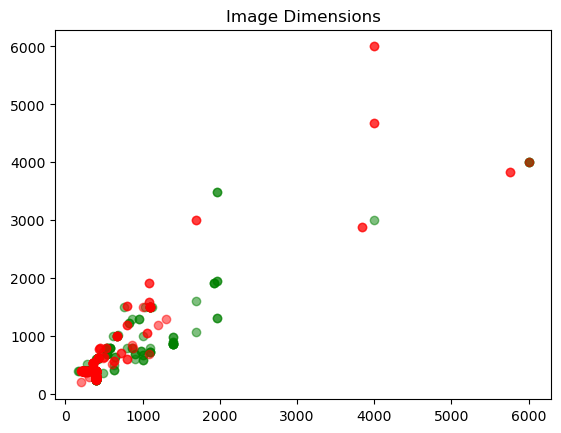

In [12]:
#plottinh the sizes of the positive and negative iamges using green for the positive and red for the negative images
plt.scatter(pos.W, pos.H, color = 'green', alpha = 0.5)
plt.scatter(neg.W, neg.H, color = 'red', alpha = 0.5)
plt.title('Image Dimensions')
plt.show()

Most of the images seem to be under the 1500X2000 pixels with few larger than those dimensions. Next we will take a look a the type of images (image extension types):

In [13]:
pos.type.str.lower()

0       jpg
1       jpg
2       jpg
3       jpg
4       jpg
       ... 
156    jpeg
157    jpeg
158    jpeg
159    jpeg
160    jpeg
Name: type, Length: 161, dtype: object

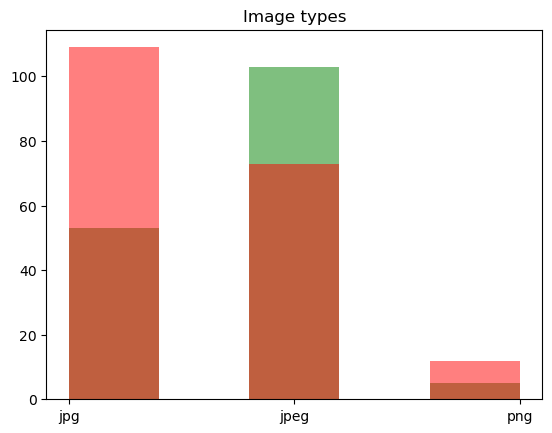

In [14]:
#we are plotting the count of types of types for both positive and negative images:
plt.hist(pos.type.str.lower(), color='green', alpha = 0.5, bins = 5)
plt.hist(neg.type.str.lower(), color='red', alpha = 0.5, bins =5)
plt.title('Image types')
plt.show()

It looks like most of the imagesa re jpg and jpeg with just a few png.
The next step in our analysis will be to analyse the color composition of the positive and negative images. to do this, we will first write a funciton to plot a color histogram for a given image:

In [15]:
#used to plot a color histogram of a given image. offers the possibility to cap the occurance
def im_histogram(image, top = 256):
    r = image[:,:,0].ravel()
    g = image[:,:,1].ravel()
    b = image[:,:,2].ravel()
    print(f"Color Red, average = {r.mean():.2f} std = {r.std():.2f}")
    print(f"Color Green, average = {g.mean():.2f} std = {g.std():.2f}")
    print(f"Color Blue, average = {b.mean():.2f} std = {b.std():.2f}")
    plt.hist(r[r<top], bins = top, color = 'r', alpha = 0.5)
    plt.hist(g[g<top], bins = top, color = 'g', alpha = 0.5)
    plt.hist(b[b<top], bins = top, color = 'b', alpha = 0.5)
    plt.title("Histogram color frequency for image")
    plt.show()

In [16]:
image = imread('../data/pos/' + pos.iloc[2, 4])

Color Red, average = 132.18 std = 70.37
Color Green, average = 114.35 std = 60.52
Color Blue, average = 106.82 std = 61.83


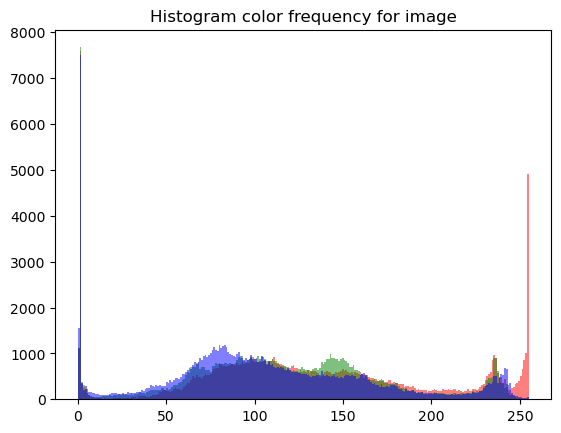

In [17]:
im_histogram(image)

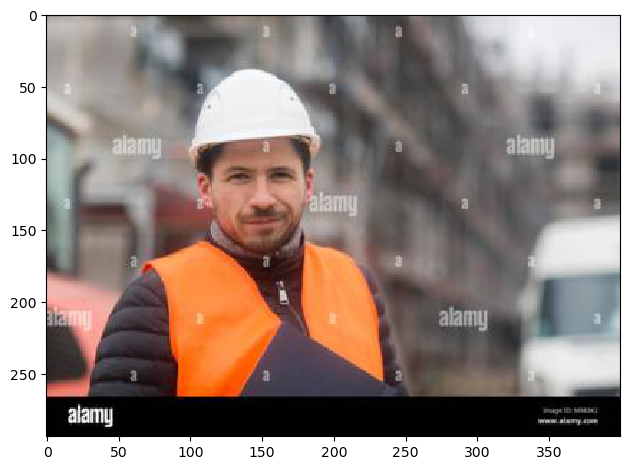

In [18]:
from skimage.io import imshow
imshow(image)

In [31]:
print(pos.W.mode())
print(pos.H.mode())

0    400
Name: W, dtype: int64
0    400
Name: H, dtype: int64


In [63]:
# Importing Keras 
from keras.models import Sequential                          # Neural network model as a sequence of layers.
from keras.layers import Conv2D                              # Convolutional layer
from keras.layers import MaxPooling2D                        # Max pooling layer 
from keras.layers import Flatten                             # Layer used to flatten 2D arrays for fully-connected layers.
from keras.layers import Dense                               # This layer adds fully-connected layers to the neural network.
from keras.layers import Dropout                             # This serves to prevent overfitting by dropping out a random set of activations.
from keras.layers import BatchNormalization                  # This is used to normalize the activations of the neurons.
from keras.layers import Activation                          # Layer for activation functions
from keras.callbacks import EarlyStopping, ModelCheckpoint   # Classes used to save weights and stop training when improvements reach a limit
from keras.models import load_model                          # This helps us to load trained models
# Preprocessing layers
from keras.layers import Rescaling                           # This layer rescales pixel values

# Importing TensorFlow
import tensorflow as tf

In [64]:
# Creating a Dataset for the Training data
train = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Alfredo/Documents/GitHub/Capstone3/data",  # Directory where the Training images are located
    labels = 'inferred', # Classes will be inferred according to the structure of the directory
    label_mode = 'categorical',
    class_names = ['pos', 'neg'], #extensions of the folders holding the classes
    batch_size = 16,    # Number of processed samples before updating the model's weights
    image_size = (400, 400), # Defining a fixed dimension for all images
    shuffle = True,  # Shuffling data
    seed = seed,  # Random seed for shuffling and transformations
    validation_split = 0, # We don't need to create a validation set from the training set
    crop_to_aspect_ratio = True # Resize images without aspect ratio distortion
)

Found 355 files belonging to 2 classes.


In [44]:
print('\nTraining Dataset:', train)


Training Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>


We are getting the results of how the data is going to be reviewed:
<ul>
    <li>Data is going to be returned in batches</li>
    <li><b>TensorSpec(shape=(None, 400, 400, 3), dtype=tf.uint8, name=None)</b> represents the features. None represents the batch size, which is None here because it can vary depending on how many samples we have in the last batch; 400, 400 represents the height and width of the images; 3 is the number of channels in the images, indicating they are RGB images. Last, dtype=tf.unit8 tells us that the data type of the image pixels is an unsigned integer of 8 bits.</li>
    <li><b>TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)</b> represents the labels in our dataset. Here, None refers to the batch size; 2 refers to the number of labels in the dataset; whilst dtype=tf.float32 is also a 32-bit floating point. </li>
</ul>

The next step for preprocessing is ensuring that the pixel values of our images are within a 0 to 1 range. First lest confirm the minimum and maximum pixel value for the training dataset:

In [55]:
# Checking minimum and maximum pixel values in the Validation dataset
min_value = float('inf')
max_value = -float('inf')

for img, label in train:
    batch_min = tf.reduce_min(img)
    batch_max = tf.reduce_max(img)
    
    min_value = min(min_value, batch_min.numpy())
    max_value = max(max_value, batch_max.numpy())
    
print('\nMinimum pixel value in the Validation dataset', min_value)
print('\nMaximum pixel value in the Validation dataset', max_value)


Minimum pixel value in the Validation dataset 0.0

Maximum pixel value in the Validation dataset 1.0


It looks like the pixels are withing the 0 and 1 range sow e can continue with building the model. To build the Convolutional Neural Network with Keras, we are going to use the <i>Sequential</i> class. This class allows us to build a linear stack of layers, which is essential for the creation of neural networks.

In [59]:
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        seed = seed),
        
        
        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        seed = seed),
        
        tf.keras.layers.RandomContrast(
        factor = (.5),
        seed = seed)
    ]
)

In [61]:
# Configuring GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")  
        print('\nGPU Found! Using GPU...')
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy() #remove to try to use the GPU
    print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [69]:
# Initiating model on GPU
with strategy.scope():
    model = Sequential()

    model.add(augmentation) # Adding data augmentation pipeline to the model

    # Feature Learning Layers
    model.add(Conv2D(32,                  # Number of filters/Kernels
                     (3,3),               # Size of kernels (3x3 matrix)
                     strides = 1,         # Step size for sliding the kernel across the input (1 pixel at a time).
                     padding = 'same',    # 'Same' ensures that the output feature map has the same dimensions as the input by padding zeros around the input. 
                    input_shape = (400,400,3) # Input image shape
                    ))
    model.add(Activation('relu'))# Activation function
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (5,5), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    model.add(Conv2D(512, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    model.add(Dropout(0.3))

    # Flattening tensors
    model.add(Flatten())

    # Fully-Connected Layers
    model.add(Dense(2048))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(2, activation = 'softmax')) # Classification layer

In [70]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

In [71]:
# Training and Testing Model
try:
    history = model.fit(
        train, epochs = 50)
except Exception as e:
    print("An error occurred:", e)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 538s 22s/step - accuracy: 0.5907 - loss: 12.9778
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 578s 25s/step - accuracy: 0.5141 - loss: 5.9710
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 582s 25s/step - accuracy: 0.5986 - loss: 6.2697
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 522s 23s/step - accuracy: 0.5495 - loss: 5.8744
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 536s 23s/step - accuracy: 0.5299 - loss: 4.5353
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 572s 25s/step - accuracy: 0.6189 - loss: 5.4045
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 584s 26s/step - accuracy: 0.5845 - loss: 3.3367
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 700s 30s/step - accuracy: 0.5816 - loss: 4.1526
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 563s 24s/step - accuracy: 0.6026 - loss: 4.4409
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 593s 26s/step - accuracy: 0.6079 - loss: 3.2468
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 557s 24s/step - accuracy: 0.5901 - loss: 2.9105
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 566s 25s/ste

In [73]:
model.save('safety_gear_detect_V1.keras')

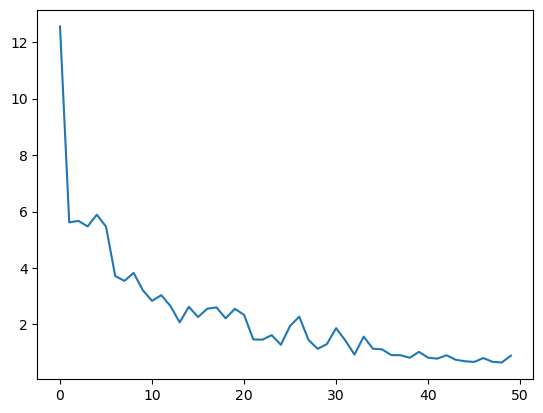

In [84]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])

In [97]:
np.ones(50)*0.5

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

C:\Users\Alfredo\AppData\Local\Temp\ipykernel_1124\2639163134.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


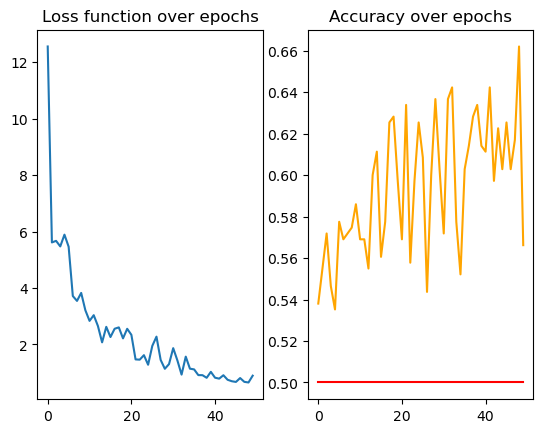

In [100]:
# Creating subplot
fig, (ax1, ax2) = plt.subplots(1,2)

# Loss over epochs
ax1.plot(range(len(history.history['loss'])), history.history['loss'])
ax1.set_title('Loss function over epochs')
ax2.plot(range(len(history.history['loss'])), history.history['accuracy'], color = 'orange')
ax2.plot(range(len(history.history['loss'])), np.ones(50)*0.5, color = 'red')
ax2.set_title('Accuracy over epochs')
fig.show()

In [74]:
val_loss, val_acc = model.evaluate(train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5322 - loss: 756.0055
